In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import *
from sklearn import preprocessing
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# get data
X_train, y_train = load_svmlight_file("D://机器学习实验//lab2//a9a.txt", n_features = 123)
y_train = y_train.reshape(y_train.shape[0], 1)
y_train[y_train == -1] = 0

X_test, y_test = load_svmlight_file("D://机器学习实验//lab2//a9a.t", n_features = 123)
y_test = y_test.reshape(y_test.shape[0], 1)
y_test[y_test == -1] = 0

In [82]:
# loss function
def Loss(X, y, theta):
    loss = -(y * log(Sigmoid(X * theta)) + (1 - y) * log(1 - Sigmoid(X * theta))).sum() 
    return loss / X.shape[0]
    
def Sigmoid(n):
    return 1 / (1 + np.exp(-n))

# grad
def Grad(w):
    grad = X_train[random.randint(0, m)].T * (Sigmoid(X_train[random.randint(0, m)] * w) - y_train[random.randint(0, m)])
    return grad

# SGD
def SGD(theta):
    for i in range(0, loops):
        grad = Grad(theta)
        theta = theta - Eta * grad
        
        lossTrain.append(Loss(X_train, y_train, theta))
        lossValidation.append(Loss(X_test, y_test, theta))
        train_accuracy.append(Accuracy(X_train, y_train, theta))
        validation_accuracy.append(Accuracy(X_test, y_test, theta))
        
# calculate accuracy
def Accuracy(X, y, theta):
    acc = Sigmoid(X * theta)
    acc[acc > (1.0/2)] = 1
    acc[acc <= (1.0/2)] = 0
    return np.count_nonzero(acc == y) / X.shape[0]

In [83]:
# parameter initialization
m, n = np.shape(X_train)
theta = np.ones((n, 1))
Eta = 0.05
loops = 666
lossTrain = []
lossValidation = []
train_accuracy = []
validation_accuracy = []

The best accuracy of train is  0.7198796105770707
The best accuracy of validation is  0.7243412566795652


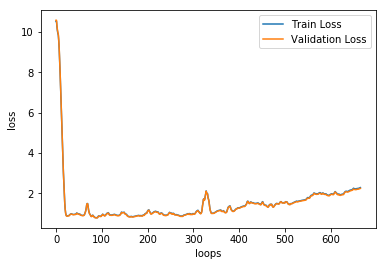

In [84]:
# parameter initialization
theta = np.ones((n, 1))

lossTrain_NAG = []
lossValidation_NAG = []
train_accuracy_NAG = []
validation_accuracy_NAG = []

# NAG optimizer
def NAG(theta):
    gamma = 0.7
    V = 0
    
    for i in range(0, loops):
        grad = Grad(theta - gamma * V)
        V = gamma * V + Eta * grad
        theta = theta - V
        
        lossTrain_NAG.append(Loss(X_train, y_train, theta))
        lossValidation_NAG.append(Loss(X_test, y_test, theta))
        train_accuracy_NAG.append(Accuracy(X_train, y_train, theta))
        validation_accuracy_NAG.append(Accuracy(X_test, y_test, theta))
        
NAG(theta)

print("The best accuracy of train is ", max(train_accuracy_NAG))
print("The best accuracy of validation is ", max(validation_accuracy_NAG))

# draw
plt.plot(lossTrain_NAG, label = "Train Loss") 
plt.plot(lossValidation_NAG, label = "Validation Loss")
plt.xlabel("loops")
plt.ylabel("loss")
plt.legend()
plt.show()

The best accuracy of train is  0.7446945732624919
The best accuracy of validation is  0.7500153553221547


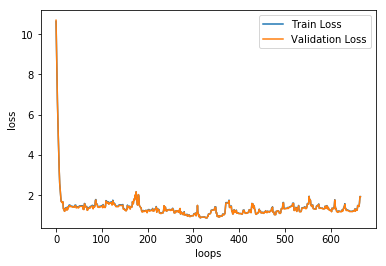

In [85]:
# parameter initialization
theta = np.ones((n, 1))

lossTrain_RMSProp = []
lossValidation_RMSProp = []
train_accuracy_RMSProp = []
validation_accuracy_RMSProp = []

# RMSProp optimizer
def RMSProp(theta):
    gamma = 0.9
    Gt = 0
    epsilon = 0.00000001
    
    rate = 0.45
    
    for i in range(0, loops):
        grad = Grad(theta)
        Gt = gamma * Gt + ((1 - gamma) * (grad ** 2)).sum()
        theta = theta - rate * grad / math.sqrt(Gt + epsilon)
        
        lossTrain_RMSProp.append(Loss(X_train, y_train, theta))
        lossValidation_RMSProp.append(Loss(X_test, y_test, theta))
        train_accuracy_RMSProp.append(Accuracy(X_train, y_train, theta))
        validation_accuracy_RMSProp.append(Accuracy(X_test, y_test, theta))

RMSProp(theta)

print("The best accuracy of train is ", max(train_accuracy_RMSProp))
print("The best accuracy of validation is ", max(validation_accuracy_RMSProp))

# draw
plt.plot(lossTrain_RMSProp, label = "Train Loss") 
plt.plot(lossValidation_RMSProp, label = "Validation Loss")
plt.xlabel("loops")
plt.ylabel("loss")
plt.legend()
plt.show()

The best accuracy of train is  0.7684653419735266
The best accuracy of validation is  0.7697315889687366


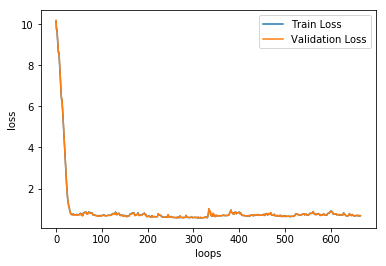

In [86]:
# parameter initialization
theta = np.ones((n, 1))

lossTrain_AdaDelta = []
lossValidation_AdaDelta = []
train_accuracy_AdaDelta = []
validation_accuracy_AdaDelta = []

# AdaDelta optimizer
def AdaDelta(theta):
    gamma = 0.87
    Gt = 0
    epsilon = 0.00000001
    delta_t = 0
    delta_theta = 0
    
    rate = 1000
    
    for i in range(0, loops):
        grad = Grad(theta)
        Gt = gamma * Gt + ((1 - gamma) * (grad ** 2)).sum()
        delta_theta = -math.sqrt(delta_t + epsilon) *grad / math.sqrt(Gt + epsilon)
        delta_t = gamma * delta_t + ((1 - gamma) * (delta_theta ** 2)).sum()
        theta = theta + rate * delta_theta
        
        lossTrain_AdaDelta.append(Loss(X_train, y_train, theta))
        lossValidation_AdaDelta.append(Loss(X_test, y_test, theta))
        train_accuracy_AdaDelta.append(Accuracy(X_train, y_train, theta))
        validation_accuracy_AdaDelta.append(Accuracy(X_test, y_test, theta))

AdaDelta(theta)

print("The best accuracy of train is ", max(train_accuracy_AdaDelta))
print("The best accuracy of validation is ", max(validation_accuracy_AdaDelta))

# draw
plt.plot(lossTrain_AdaDelta, label = "Train Loss") 
plt.plot(lossValidation_AdaDelta, label = "Validation Loss")
plt.xlabel("loops")
plt.ylabel("loss")
plt.legend()
plt.show()

The best accuracy of train is  0.7591904425539756
The best accuracy of validation is  0.7637737239727289


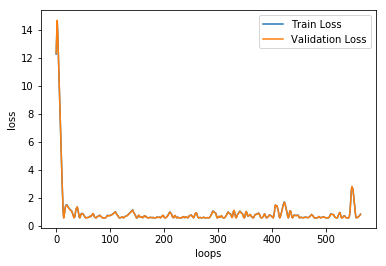

In [90]:
# parameter initialization
theta = np.ones((n, 1))

lossTrain_Adam = []
lossValidation_Adam = []
train_accuracy_Adam = []
validation_accuracy_Adam = []

# Adam optimizer
def Adam(theta):
    m = 0
    beta = 0.9
    gamma = 0.975
    Gt = 0
    t = 0
    epsilon = 0.00000001
    
    rate = 0.045
    
    for i in range(100, loops):
        grad = Grad(theta)
        t += 1
        m = beta * m + ((1 - beta) * grad).sum()
        Gt = gamma * Gt + ((1 - gamma) * (grad ** 2)).sum() 
        theta = theta - rate * (m / (1 - (beta ** t))) / (math.sqrt((Gt / (1 - (gamma ** t)))) + epsilon)
        
        lossTrain_Adam.append(Loss(X_train, y_train, theta))
        lossValidation_Adam.append(Loss(X_test, y_test, theta))
        train_accuracy_Adam.append(Accuracy(X_train, y_train, theta))
        validation_accuracy_Adam.append(Accuracy(X_test, y_test, theta))

Adam(theta)

print("The best accuracy of train is ", max(train_accuracy_Adam))
print("The best accuracy of validation is ", max(validation_accuracy_Adam))

# draw
plt.plot(lossTrain_Adam, label = "Train Loss") 
plt.plot(lossValidation_Adam, label = "Validation Loss")
plt.xlabel("loops")
plt.ylabel("loss")
plt.legend()
plt.show()

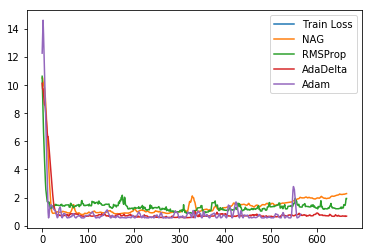

In [91]:
plt.plot(lossTrain, label = "Train Loss")
plt.plot(lossTrain_NAG, label = "NAG")
plt.plot(lossTrain_RMSProp, label = "RMSProp")
plt.plot(lossTrain_AdaDelta, label = "AdaDelta")
plt.plot(lossTrain_Adam, label = "Adam")
plt.legend()
plt.show()